In [1]:
import control as ct
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# Setup the true physical system

### Create 2nd order C.T stable transfer function (system to be identified)

The system is stable:  True


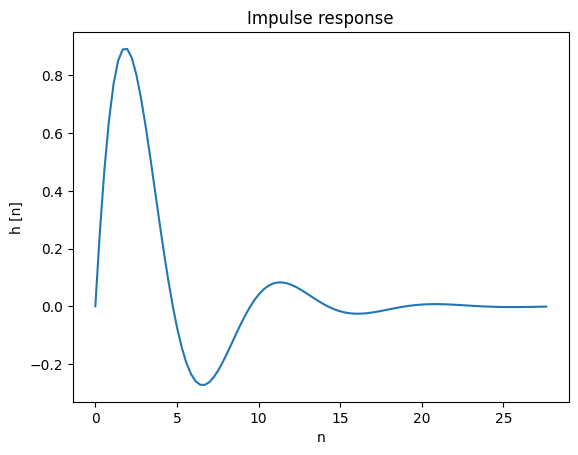

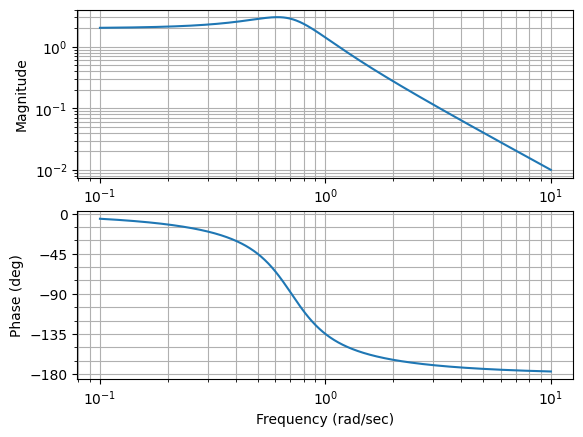

In [2]:
m = 1.0
b = 0.5
k = 0.5

num = [1.0]
den = [m,b,k]

sys_tf = ct.tf(num, den)

zp = sys_tf.pole()
stable = all([abs(p)<1 for p in zp])
print('The system is stable: ', stable)

T, h_t = ct.impulse_response(sys_tf)
plt.plot(T, h_t)
plt.xlabel('n')
plt.ylabel('h [n]')
plt.title('Impulse response')
plt.show()
mag, phase, omega = ct.bode(sys_tf)

### Get D.T Ttransfer function using zero-order hold

In [3]:
# sys_tfd = ct.sample_system(sys_tf, 1, method='zoh')
# T, h_n = ct.impulse_response(sys_tfd, T=np.arange(25))
# # print('h[n]: ', [ '%.2f' % elem for elem in h_n ])
# # plt.stem(T, h_n)
# # plt.xlabel('n')
# # plt.ylabel('h [n]')
# # plt.title('Impulse response')
# # plt.show()
# mag, phase, omega = ct.bode(sys_tfd)

# Conduct experiment and measure the frequency reponse for all $l$ frequencies 

## Case 2:  With measurement noise (white noise)

In [6]:
# Set number of samples to be measured
N = 200

N_T = 0

# Set number of experiment cycles 
l = np.arange(0,N//2)

# compute frequencies at which response is to be measures
omega_l = (2*np.pi*l)/N

# input cos wave 
A = 1.0

# model white noise as zero mean gaussian
w_std_dev = 0.0

u_vec = []
y_vec = []

amplitude_vec = []
phase_vec = []


for index,omega in enumerate(omega_l):
    
    # Set number of samples wait before measuring
#     if omega!=0.0:
#         N_T = int((2.0*np.pi)/omega)
        
    # create input cos wave at the particular freq
    t = np.arange(0,N+N_T)
    u = A*np.cos(omega*t)
    
    # Compute output
    t, y = ct.forced_response(sys_tf, T=t, U=u, X0=0.0)
    
    # discard samples collected before N_T
    u = u[N_T:]
    y = y[N_T:]
    t = t[N_T:]
    
    # reset time vector to start from t-0
    t = t - t[0]
    
    # add measurement noise
    w = np.random.normal(0.0, w_std_dev, N)
    y = y + w                                            
    
    #Compute DFT of impulse reponse to get esimated freq. response
    f_hat = fftpack.fft(y)

    # We consider only the first half of the frequencies(see image), the other half is just it's complex conjugate
    f_hat_first_half = f_hat[:N//2]

    # compute amplitude and phase of fourier coefficient corresponding to the input frequency 
    amplitude =  np.abs(f_hat_first_half[index]) / (N//2)
    phase_deg=  np.angle(f_hat_first_half[index], deg=True)
        
    phase_rad=  np.angle(f_hat_first_half[index])
    
    amplitude_vec.append(amplitude)
    phase_vec.append(phase_deg)
    
    u_vec.append(u)
    y_vec.append(y)

### Plot frequency reponse for just one frequency 

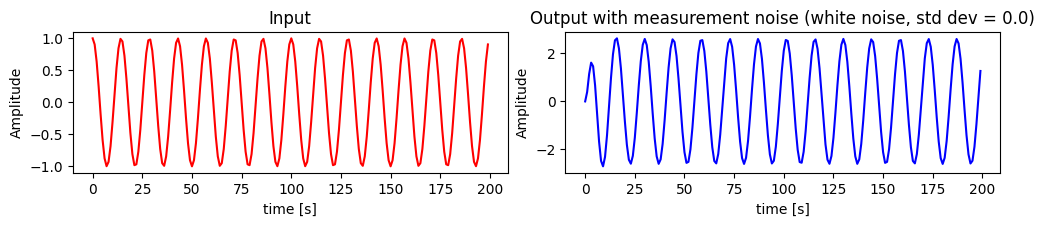

Input signal frequency:  0.43982297150257105 rad/s
Input signal time period:  14.285714285714285 s
Output signal Amplitude:  2.5545895969379595
Output signal phase difference:  -36.35769081341474 deg


In [7]:
# select frequency
i = 14

#define subplots
fig, ax = plt.subplots(1, 2, figsize=(10,2))
fig.tight_layout()

#create subplots
ax[0].plot(t, u_vec[i], color='red')
ax[1].plot(t, y_vec[i], color='blue')

ax[0].title.set_text('Input')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('time [s]')

ax[1].title.set_text('Output with measurement noise (white noise, std dev = ' + str(w_std_dev) + ')')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('time [s]')

plt.show()
print("Input signal frequency: ", omega_l[i], 'rad/s' )
print("Input signal time period: ", (2.0*np.pi)/omega_l[i], 's' )

print('Output signal Amplitude: ', amplitude_vec[i])
print('Output signal phase difference: ', phase_vec[i], 'deg')

### Plot  frequency response at all frequencies

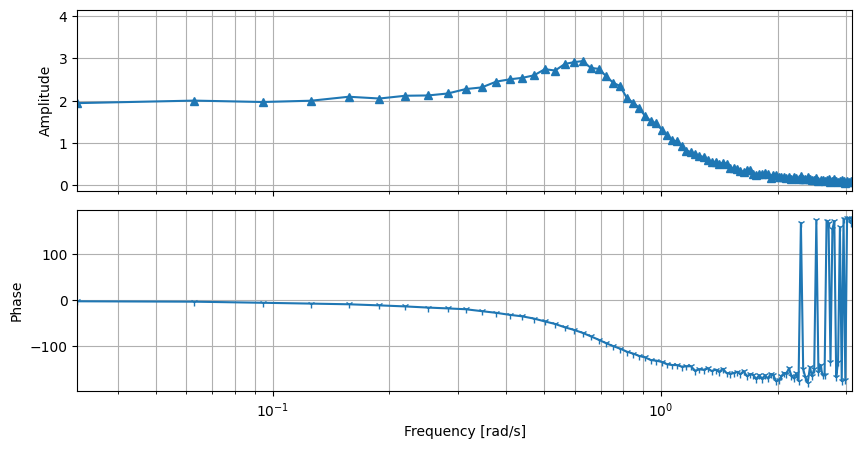

In [199]:
# Plotting
fig, axs = plt.subplots(2,1,figsize=(10,8))
fig.tight_layout()
plt.grid(True, which="both")

axs[0].plot(omega_l, amplitude_vec, marker ="^")
axs[1].plot(omega_l, phase_vec, marker ="1")

axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Format the plot
axs[0].set_ylabel('Amplitude')
axs[0].margins(x=0)
axs[0].set_xticklabels([])

axs[1].set_ylabel('Phase')
axs[1].set_xlabel('Frequency [rad/s]')
axs[1].margins(x=0)
# axs[1].set_xlim(0, duration)
# axs[1].set_ylim(-1.05, 1.05)


# Group the top two axes, since they have the same x-scale
axs[0].set_position([0.125, 0.75, 0.775, 0.227])
axs[1].set_position([0.125, 0.50, 0.775, 0.227])

# Save and show the figure
# out_file = 'FindingEvents.jpg'
# plt.savefig(out_file, dpi=200, quality=90)
# print(f'Image saved to {out_file}')

axs[0].grid(True, which="both")
axs[1].grid(True, which="both")
plt.show()